In [24]:
# Decision Tree Visualization

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
import graphviz
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


In [10]:
clf = DecisionTreeClassifier()

iris_data = load_iris()
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
print(df.head())
print(iris_data.target_names)
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2)

clf.fit(X_train,y_train)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
['setosa' 'versicolor' 'virginica']


DecisionTreeClassifier()

In [11]:
export_graphviz(clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

In [16]:
with open('tree.dot') as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)


ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

Feature importance:
[0.017 0.    0.079 0.904]
sepal length (cm) : 0.017
sepal width (cm) : 0.000
petal length (cm) : 0.079
petal width (cm) : 0.904


<AxesSubplot:>

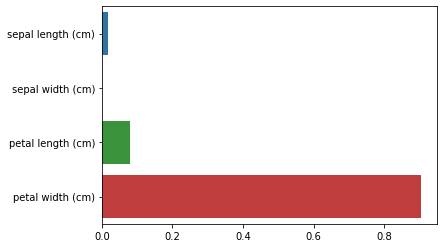

In [23]:
print('Feature importance:\n{0}'.format(np.round(clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, clf.feature_importances_) :
    print('{0} : {1:.3f}'.format(name, value))

sns.barplot(x=clf.feature_importances_, y=iris_data.feature_names)
